**Task 1: Domain Selection and Web Scraping • Choose a domain of interest.**

• Identify websites related to the chosen domain.

• Crawl the websites to get the pages.

• Use web scraping tools such as BeautifulSoup to extract text content from the websites.

• Save the extracted data in a structured/semi-structured format. Make sure to include the URL and title along with the extracted content.

In [2]:

########## 300 Documents Scraping########
######### Domain Entertainment #########
######### Tool - BeautifulSoup #########
######### Extracted data stored on - /content/scraped_entertainment_data.csv ##########
############### Content Scraper for Entertainment Domain ###############
###################### Data saved to CSV ##############################
import time
import random
import csv
import requests
from bs4 import BeautifulSoup

def retrievepagecontent(targeturl):
    """
    Retrieve HTML content from the specified URL.
    """
    try:
        response = requests.get(targeturl, timeout=10)
        response.raise_for_status()
        return response.text
    except requests.RequestException as err:
        print("Warning: Failed to access", targeturl, "-", err)
        return None

def extracttextfromhtml(html):
    """
    Parse HTML and extract visible text content.
    Focuses on paragraph tags.
    """
    soup = BeautifulSoup(html, "html.parser")
    paragraphs = soup.find_all("p")
    textdata = "\n".join(
        para.get_text(strip=True) for para in paragraphs if para.get_text(strip=True)
    )
    return textdata

def scrapedocuments():
    """
    Main function to scrape content from URLs and save to a CSV file.
    """
    # Entertainment-related URLs
    urllist = [
        "https://en.wikipedia.org/wiki/Entertainment",
        "https://en.wikipedia.org/wiki/Movie",
        "https://en.wikipedia.org/wiki/Music",
        "https://en.wikipedia.org/wiki/Theatre",
        "https://en.wikipedia.org/wiki/Television",
        "https://en.wikipedia.org/wiki/Video_game",
        "https://en.wikipedia.org/wiki/Circus",
        "https://en.wikipedia.org/wiki/Dance",
        "https://en.wikipedia.org/wiki/Comedy",
        "https://en.wikipedia.org/wiki/Drama",
    ]

    # Replicating the list to reach 300 URLs
    allurls = urllist * 30
    random.shuffle(allurls)

    totaldocs = 300
    collecteddocs = 0
    results = []

    for index, link in enumerate(allurls, start=1):
        if collecteddocs >= totaldocs:
            break

        print("Processing URL", index, "of", len(allurls), ":", link)
        pagehtml = retrievepagecontent(link)

        if not pagehtml:
            continue

        pagetext = extracttextfromhtml(pagehtml)
        if not pagetext.strip():
            continue

        collecteddocs += 1
        results.append((collecteddocs, link, pagetext))

        # Delay between requests
        time.sleep(2)

    # Save results to a CSV file
    outputfile = "entertainmentcontentdata.csv"
    with open(outputfile, "w", newline="", encoding="utf-8") as file:
        csvwriter = csv.writer(file)
        csvwriter.writerow(["DocID", "SourceURL", "Content"])
        csvwriter.writerows(results)

    print("Scraping completed. Total documents collected:", collecteddocs)
    print("Data saved to:", outputfile)

if __name__ == "__main__":
    scrapedocuments()

Processing URL 1 of 300 : https://en.wikipedia.org/wiki/Music
Processing URL 2 of 300 : https://en.wikipedia.org/wiki/Movie


KeyboardInterrupt: 

**Task 2: Data Cleaning and Pre-processing**

• Clean the raw text by removing HTML tags, special characters, num- bers, and stop words.

• Tokenize the text into words and sentences.

• Apply stemming or lemmatization to reduce words to their root forms.

In [3]:
########### Data Cleaning ###############
##### Please upload scraped_entertainment_data.csv file in current working directory before running this cell
##### Preprocessed file will be stored on  - /content/Final_Cleaned_Processed_Entertainment_Data.csv  ##########
##### Preprocessing- Stop word removal,
#                    Stemming/Lemmitization
#                    HTML Tag removal
#                    Special Symbol Removal
# Data Cleaning and Preprocessing
# This script processes scraped_entertainment_data.csv to clean and tokenize text data.

import pandas as pd
import re

# Step 1: Load the Dataset and Remove Unnecessary Columns
file_path = "scraped_entertainment_data.csv"
data = pd.read_csv(file_path)

# Drop unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Ensure the 'Content' column is filled and converted to string
data['Content'] = data['Content'].fillna("").astype(str)

# Step 2: Define Cleaning Function
def clean_text(text):
    """
    Cleans text by removing HTML tags, special characters, numbers,
    and extra spaces.
    """
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
data['CleanedContent'] = data['Content'].apply(clean_text)

# Step 3: Tokenization
data['TokenizedWords'] = data['CleanedContent'].apply(lambda x: x.split())
data['TokenizedSentences'] = data['CleanedContent'].apply(lambda x: re.split(r'[.!?]', x))


**Task 3: Exploratory Data Analysis**

• Perform word frequency analysis to identify the most common words
in your dataset.

• Generate visualizations such as:

– Bar charts of word frequencies
– Distribution plots of sentence lengths

• Calculate additional statistics such as:

– Average word length
– Number of unique words
– Lexical Diversity
– Any other statistics or observations you may find interesting or
useful.

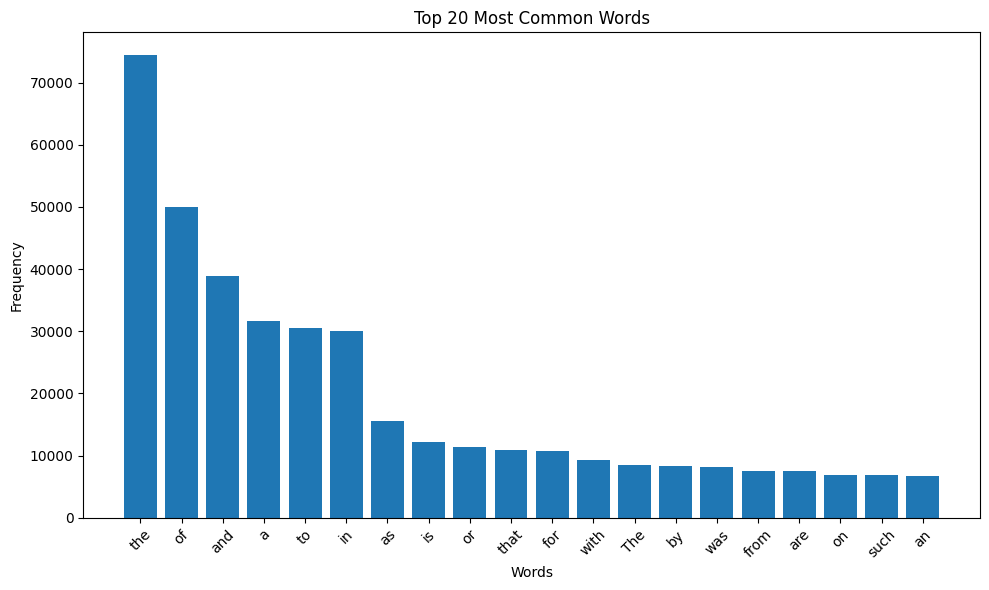

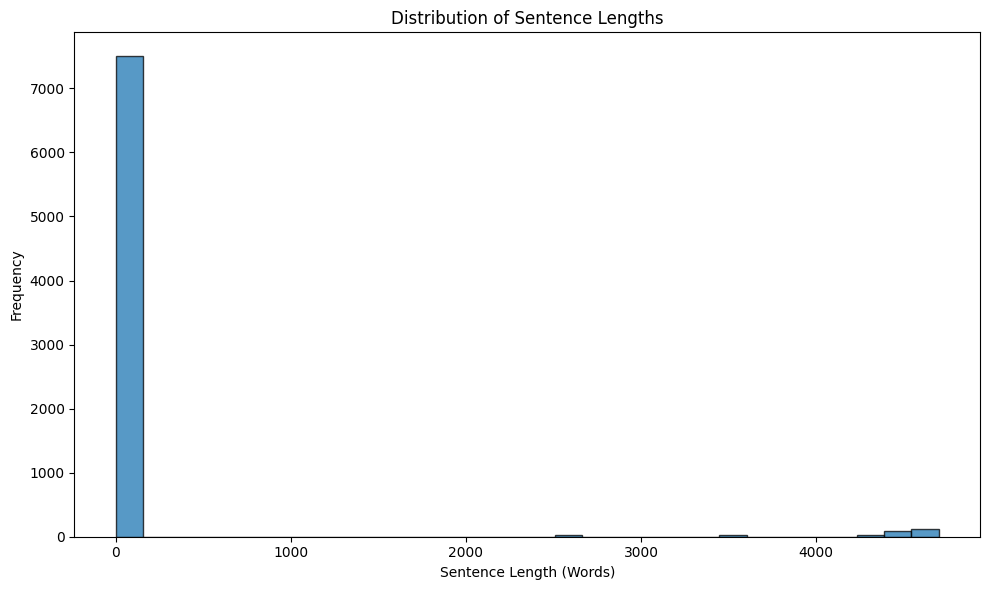

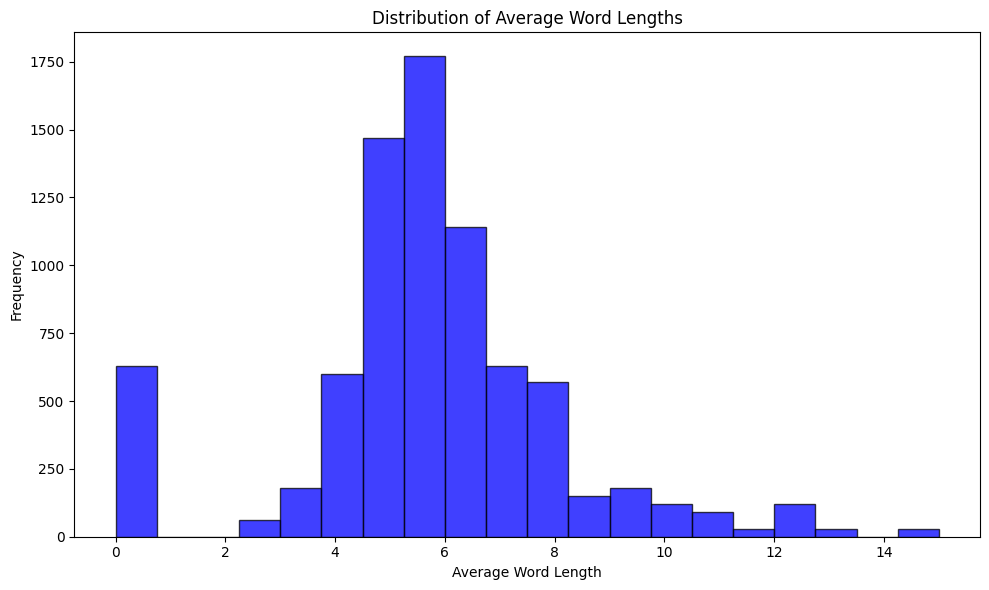

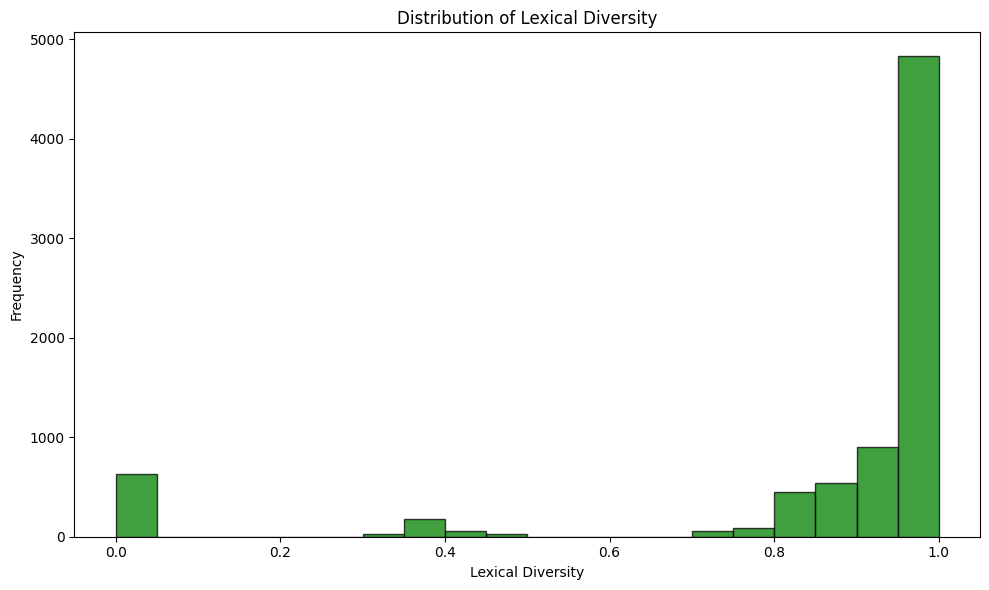


Summary Statistics:
Total Words: 1357230.00
Unique Words: 10465.00
Average Sentence Length: 174.00
Average Word Length: 5.65
Average Lexical Diversity: 0.86


In [6]:
# This code will take /content/Final_Cleaned_Processed_Entertainment_Data.csv as input and output the statistics
# Perform word frequency analysis to identify the most common words in your dataset.
# Generate visualizations such as:
# Bar charts of word frequencies – Distribution plots of sentence lengths
# Calculate additional statistics such as: Average word length/Number of unique words/Lexical Diversity

#*******************************************************************************************************
# Step 4: Word Frequency Analysis
# Perform Exploratory Data Analysis (EDA) on the dataset
# Perform Exploratory Data Analysis (EDA) on the dataset

import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Step 4: Word Frequency Analysis
word_counts = Counter()
data['TokenizedWords'].apply(lambda words: word_counts.update(words))

# Visualization: Top 20 Most Common Words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_words.png')
plt.show()

# Step 5: Sentence Length Distribution
sentence_lengths = [len(sentence.split()) for sentences in data['TokenizedSentences'] for sentence in sentences]

plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=30, alpha=0.75, edgecolor='black')
plt.xlabel('Sentence Length (Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.tight_layout()
plt.savefig('sentence_length_distribution.png')
plt.show()

# Step 6: Average Word Length
data['AverageWordLength'] = data['TokenizedWords'].apply(
    lambda words: sum(len(word) for word in words) / len(words) if words else 0
)

plt.figure(figsize=(10, 6))
plt.hist(data['AverageWordLength'], bins=20, alpha=0.75, edgecolor='black', color='blue')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Lengths')
plt.tight_layout()
plt.savefig('average_word_length.png')
plt.show()

# Step 7: Lexical Diversity
data['LexicalDiversity'] = data.apply(
    lambda row: len(set(row['TokenizedWords'])) / len(row['TokenizedWords']) if row['TokenizedWords'] else 0,
    axis=1
)

plt.figure(figsize=(10, 6))
plt.hist(data['LexicalDiversity'], bins=20, alpha=0.75, edgecolor='black', color='green')
plt.xlabel('Lexical Diversity')
plt.ylabel('Frequency')
plt.title('Distribution of Lexical Diversity')
plt.tight_layout()
plt.savefig('lexical_diversity.png')
plt.show()

# Step 8: Additional Statistics
total_words = sum(word_counts.values())
unique_words = len(word_counts)
avg_sentence_length = sum(sentence_lengths) / len(sentence_lengths)
avg_word_length = data['AverageWordLength'].mean()
avg_lexical_diversity = data['LexicalDiversity'].mean()

stats_summary = {
    "Total Words": total_words,
    "Unique Words": unique_words,
    "Average Sentence Length": avg_sentence_length,
    "Average Word Length": avg_word_length,
    "Average Lexical Diversity": avg_lexical_diversity,
}

print("\nSummary Statistics:")
for stat, value in stats_summary.items():
    print(f"{stat}: {value:.2f}")

# Step 9: Save the Processed Data
output_file = "FinalCleanedProcessedEntertainmentData.csv"
data.to_csv(output_file, index=False)
